This notebook covers using metrics to analyze the 'accuracy' of prophet models. In this notebook, we will extend the previous example (http://pythondata.com/forecasting-time-series-data-prophet-part-3/).

### Import necessary libraries

In [3]:
!pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/3e/93/32b258aa95a42d601a2b4da21f78a19869d0a33f568824b27a1677b0b9ce/fbprophet-0.4.tar.gz
  Running setup.py bdist_wheel for fbprophet ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/83/68/51da90f4dbebedf0add6c65de9d6986767b4a49357c3acd8a1
Successfully built fbprophet


In [4]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

### Read in the data

Read the data in from the retail sales CSV file in the examples folder then set the index to the 'date' column. We are also parsing dates in the data file.

In [6]:
sales_df = pd.read_csv('retail_sales.csv', index_col='date', parse_dates=True)

In [33]:
sales_df.head(10)

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022
2010-03-01,360819
2010-04-01,356460
2010-05-01,365713
2010-06-01,358675


### Prepare for Prophet

As explained in previous prophet posts, for prophet to work, we need to change the names of these columns to 'ds' and 'y'.

In [8]:
df = sales_df.reset_index()

In [34]:
df.head(10)

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022
5,2010-03-01,360819
6,2010-04-01,356460
7,2010-05-01,365713
8,2010-06-01,358675
9,2010-07-01,362027


Let's rename the columns as required by fbprophet. Additioinally, fbprophet doesn't like the index to be a datetime...it wants to see 'ds' as a non-index column, so we won't set an index differnetly than the integer index.

In [10]:
df=df.rename(columns={'date':'ds', 'sales':'y'})

In [35]:
df.head(100)

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022
5,2010-03-01,360819
6,2010-04-01,356460
7,2010-05-01,365713
8,2010-06-01,358675
9,2010-07-01,362027


Now's a good time to take a look at your data.  Plot the data using pandas' ```plot``` function

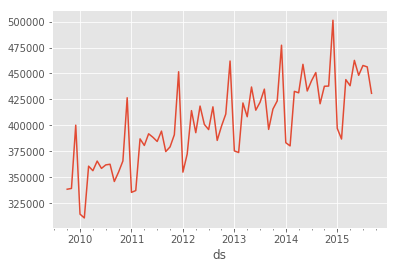

In [12]:
df.set_index('ds').y.plot()

### Running Prophet

Now, let's set prophet up to begin modeling our data using our ```promotions``` dataframe as part of the forecast

Note: Since we are using monthly data, you'll see a message from Prophet saying ```Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.```  This is OK since we are workign with monthly data but you can disable it by using ```weekly_seasonality=True``` in the instantiation of Prophet.

In [13]:
model = Prophet(weekly_seasonality=True)
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


We've instantiated the model, now we need to build some future dates to forecast into.

In [14]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


To forecast this future data, we need to run it through Prophet's model.

In [15]:
forecast = model.predict(future)

The resulting forecast dataframe contains quite a bit of data, but we really only care about a few columns.  First, let's look at the full dataframe:

In [16]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
91,2017-04-30,468160.726562,464622.918958,471211.685361,472231.321025,483516.326468,9949.624843,9949.624843,9949.624843,0.0,0.0,0.0,-6577.618035,-6577.618035,-6577.618035,16527.242878,16527.242878,16527.242878,478110.351405
92,2017-05-31,469142.062149,465289.118167,472475.014590,471395.220593,482380.421465,7866.517951,7866.517951,7866.517951,0.0,0.0,0.0,3146.116629,3146.116629,3146.116629,4720.401323,4720.401323,4720.401323,477008.580101
93,2017-06-30,470091.741750,465946.040180,473644.057545,470137.410926,481872.088370,5923.068280,5923.068280,5923.068280,0.0,0.0,0.0,1374.307979,1374.307979,1374.307979,4548.760301,4548.760301,4548.760301,476014.810030
94,2017-07-31,471073.077338,466620.719892,474881.004531,473765.269834,486137.331784,8969.601575,8969.601575,8969.601575,0.0,0.0,0.0,502.958175,502.958175,502.958175,8466.643400,8466.643400,8466.643400,480042.678913
95,2017-08-31,472054.412925,467324.825409,476152.299488,449650.900882,461909.070337,-16239.181115,-16239.181115,-16239.181115,0.0,0.0,0.0,3075.012923,3075.012923,3075.012923,-19314.194038,-19314.194038,-19314.194038,455815.231810


We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,478110.351405,472231.321025,483516.326468
92,2017-05-31,477008.580101,471395.220593,482380.421465
93,2017-06-30,476014.810030,470137.410926,481872.088370
94,2017-07-31,480042.678913,473765.269834,486137.331784
95,2017-08-31,455815.231810,449650.900882,461909.070337


### Plotting Prophet results

Prophet has a plotting mechanism called ```plot```.  This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

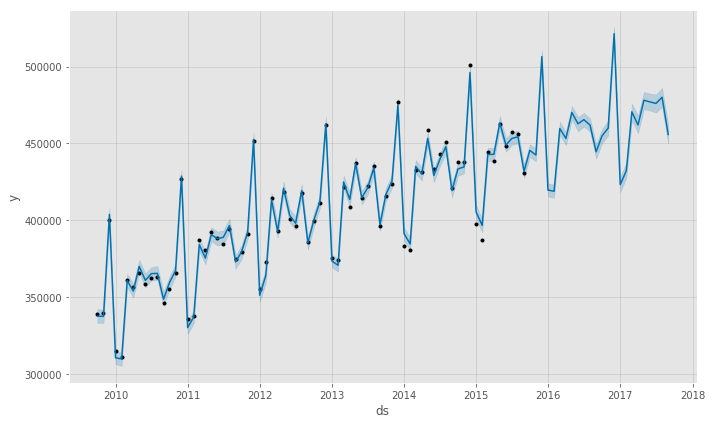

In [18]:
model.plot(forecast);

Personally, I'm not a fan of this visualization but I'm not going to build my own...you can see how I do that here:
https://github.com/urgedata/pythondata/blob/master/fbprophet/fbprophet_part_one.ipynb.

Additionally, prophet let's us take a at the components of our model, including the holidays. This component plot is an important plot as it lets you see the components of your model including the trend and seasonality (identified in the ```yearly``` pane).

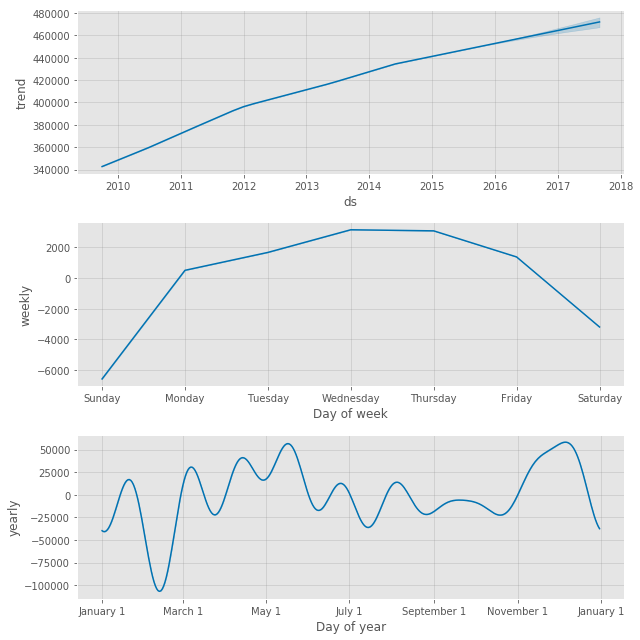

In [19]:
model.plot_components(forecast);

Now that we have our model, let's take a look at how it compares to our actual values using a few different metrics - R-Squared and Mean Squared Error (MSE).

To do this, we need to build a combined dataframe with yhat from the forecasts and the original 'y' values from the data.

In [20]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [21]:
metric_df.tail()

,ds,yhat,y
91,2017-04-30,478110.351405,NaN
92,2017-05-31,477008.580101,NaN
93,2017-06-30,476014.810030,NaN
94,2017-07-31,480042.678913,NaN
95,2017-08-31,455815.231810,NaN


You can see from the above, that the last part of the dataframe has "NaN" for 'y'...that's fine because we are only concerend about checking the forecast values versus the actual values so we can drop these "NaN" values. 

In [22]:
metric_df.dropna(inplace=True)

In [23]:
metric_df.tail()

,ds,yhat,y
67,2015-05-01,463320.509381,462615.0
68,2015-06-01,448901.319737,448229.0
69,2015-07-01,453206.374297,457710.0
70,2015-08-01,454321.126965,456340.0
71,2015-09-01,431780.606392,430917.0


Now let's take a look at our R-Squared value

In [24]:
r2_score(metric_df.y, metric_df.yhat)

0.992914666586514

An r-squared value of 0.99 is amazing (and probably too good to be true, which tells me this data is most likely overfit).

In [25]:
mean_squared_error(metric_df.y, metric_df.yhat)

11178768.062319752

That's a large MSE value...and confirms my suspicion that this data is overfit and won't likely hold up well into the future. Remember...for MSE, closer to zero is better.

Now...let's see what the Mean Absolute Error (MAE) looks like.

In [26]:
mean_absolute_error(metric_df.y, metric_df.yhat)

2618.0169868582266

Not good. Not good at all. BUT...the purpose of this particular post is to show some usage of R-Squared, MAE and MSE's as metrics and I think we've done that.  

I can tell you from experience that part of the problem with this particular data is that its monthly and there aren't that many data points to start with (only 72 data points...not ideal for modeling).

# Another approach for metrics

While writing this post, I came across ML Metrics (https://github.com/benhamner/Metrics), which provides 17 metrics for Python (python version here --> https://github.com/benhamner/Metrics/tree/master/Python). 

Let's give it a go and see what these metrics show us.

In [28]:
!pip install ml_metrics

  Running setup.py bdist_wheel for ml-metrics ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built ml-metrics


In [29]:
import ml_metrics as metrics

In [30]:
metrics.mae(metric_df.y, metric_df.yhat)

2618.0169868582266

Same value for MAE as before...which is a good sign for this new metrics library. Let's take a look at a few more.

Here's the Absolute Error (pointwise...shows the error of each date's predicted value vs actual value)

In [31]:
metrics.ae(metric_df.y, metric_df.yhat)

array([1131.79880715, 2026.46157757, 3480.33900712, 4240.55407942,
       1409.98047436,  214.40289485, 2593.24238207, 4153.66714873,
       2101.75151991, 3135.60321329, 2665.65109451, 2469.80233483,
       4046.50044602, 1346.80188161, 2000.98644468, 5554.38158989,
        420.5191033 , 2938.26736625, 5448.03295845, 1325.06770074,
        727.22886474, 4251.70206709, 1971.60837034, 2116.03927295,
         21.60203288,  968.99690026,  943.99042787, 3942.73922118,
       8654.87835753,  982.17347926,  355.67576337, 2141.22936992,
       2068.30129883, 2009.2634052 , 1364.76145543,  416.98444765,
        456.51649947, 1133.53280158,  775.47797483, 2201.56999822,
       3320.39573643, 3230.070696  , 5106.90408244,  124.54702208,
         98.78323348, 1317.79970451,  907.5588787 ,  774.5361465 ,
        950.27567268, 1789.02004584, 2111.3290754 , 7860.54269726,
       4183.56821772, 2226.00658886, 1341.1009071 , 5569.32271166,
       4029.61029299, 3600.36806299, 3082.82128361, 1561.52366

Let's look at Root Mean Square Error

In [32]:
metrics.rmse(metric_df.y, metric_df.yhat)

3343.466473933865